<a href="https://colab.research.google.com/github/steve-shim/dlgom/blob/main/python/%ED%81%B4%EB%9E%98%EC%8A%A4_%EC%A3%BC%EC%9D%98%EC%82%AC%ED%95%AD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**클래스 변수:**
클래스에 의해 생선된 모든 객체가 같은 값을 조회할 때 사용하는 변수
객체 생성이후에 안의 값을 변경 할 수 없다

**인스턴스 변수:**
인스턴스화 될 때마다 새로운 값이 할당되며 서로 다른 객체 간에는 값을 공유할 수 없는 변수
객체 생성이후에 안의 값을 변경할 수 있다
→ 객체 단위로 값이 따로 관리되는 변수는 반드시 인스턴스 변수를 사용해야 한다

In [1]:
class BookReader:
    country = 'South Korea' # immutable 클래스 변수 선언
    
    def __init__(self, name):
        self.name = name # 인스턴스 변수 name 선언
        #self.country = 'aaa'

    def read_book(self):
        print(self.name, 'is reading in', self.country)
    
chris = BookReader('Chris Cho')
anna = BookReader('Anna Cho')
chris.read_book()
anna.read_book()


Chris Cho is reading in South Korea
Anna Cho is reading in South Korea


In [2]:
chris.read_book()

Chris Cho is reading in South Korea


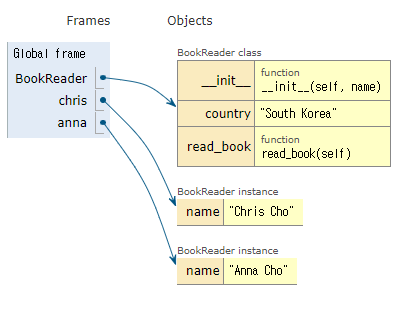

**클래스변수에 immutable한 변수(문자열)가 들어갔을때 생길수 있는 문제점**



In [3]:
chris.country = 'USA'
chris.read_book()
anna.read_book()

Chris Cho is reading in USA
Anna Cho is reading in South Korea


chris.country = 'USA'

인스턴스변수로는 클래스 변수의 값을 바꿀수 없다

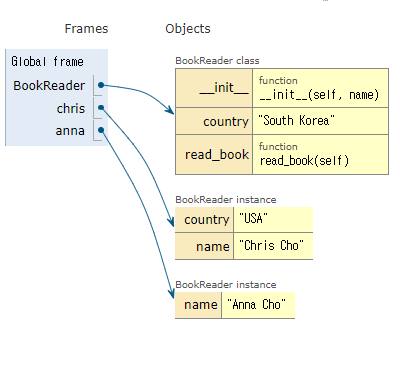

In [4]:
BookReader.country = 'Italy'
chris.read_book()
anna.read_book()

Chris Cho is reading in USA
Anna Cho is reading in Italy


BookReader.country = 'Italy' 

클래스이름.변수 = 값 으로 바꿔야 클래스 변수가 바뀐다

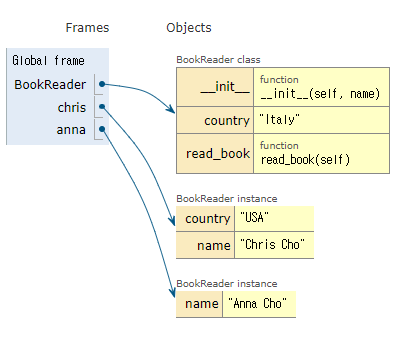

In [5]:
sean = BookReader('Sean Cho')
sean.read_book()

Sean Cho is reading in Italy


BookReader 클래스로 만든 객체들 중에서 chris 만 따로 country 라는 변수가 생성되어있음을 알 수 있다

다른 객체들은 country가 호출될 때 클래스변수의 country를 참조하지만 chris는 클래스변수가 아닌 자신의 country의 값을 가져온다(자기 혼자 놀기 시작한다)  

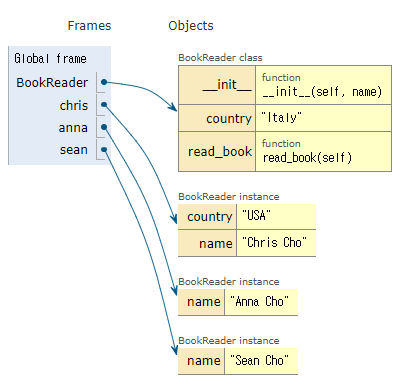

In [6]:
chris.read_book()

Chris Cho is reading in USA


클래스변수는 상수 같은 개념이기 때문에 내부용으로 쓸 변수라는 의미의 변수명에_를 쓴다

1. 내부용 변수 이름은 언더스코어(_)로 시작할 것!
2. 상수는 대문자로 표기할 것!
3. 클래스 변수 접근은 객체(self)가 아닌, 클래스 이름으로 접근할 것!

In [7]:
class SKBookReader:
    _COUNTRY = 'South Korea'

    def __init__(self, name):
        self.name = name
        
    def read_book(self):
        print(self.name, 'is reading in', self._COUNTRY) 

insuk = SKBookReader('조인석')
insuk.name

insuk.read_book()

insuk._COUNTRY = 'UK'
insuk._COUNTRY # 'UK' 인스턴스 변수가 없다가 인스턴스 변수처럼 뒤늦게 생긴다
insuk.read_book() # self._COUNTRY 로 접근했을 때는 UK 로 출력


조인석 is reading in South Korea
조인석 is reading in UK


In [8]:
class SKBookReader:
    _COUNTRY = 'South Korea' 

    def __init__(self, name):
        self.name = name
        
    def read_book(self):
        print(self.name, 'is reading in', SKBookReader._COUNTRY) 
        # self.country 이렇게 접근했을 때는 인스턴스 변수가 생성되어도 

insuk = SKBookReader('조인석')
insuk.name

insuk.read_book() 

insuk._COUNTRY = 'UK'
insuk._COUNTRY # 'UK' 인스턴스 변수가 없다가 인스턴스 변수처럼 뒤늦게 생긴다
insuk.read_book() # SKBookReader._COUNTRY 로 접근했을 때는 South Korea 로 출력
# 클래스 변수로 접근했기 때문에 인스턴스 변수 UK가 생겨도 클래스변수로 접근하여 조금 더 안전하게 쓸수 있다


조인석 is reading in South Korea
조인석 is reading in South Korea


In [9]:
print(insuk._COUNTRY)
print(SKBookReader._COUNTRY)

UK
South Korea


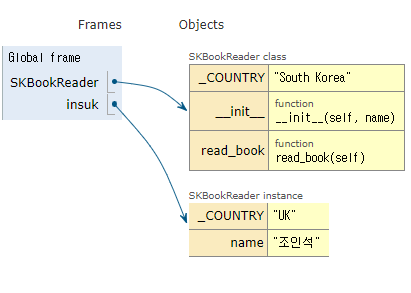

**클래스 변수에 mutable한 변수가 들어갔을때 생길수 있는 문제점**

인스턴스 변수에 값을 추가했는데 클래스 변수의 값도 변할 수 있다 

In [10]:
class Programmer:
    languages = [] # mutable 클래스 변수 선언
    
    def __init__(self, name): # 초기화 함수 재정의
        self.name = name # 인스턴스 변수 선언 및 초기화
    def add_lang(self, lang): 
        Programmer.languages.append(lang) # 클래스 변수 값 변경(클래스 안에서 self 안쓰면 에러)
        
        
chris = Programmer('Chris Cho')
chris.add_lang('Python')
chris.add_lang('Java')
print(chris.name)
print(chris.languages)
print(Programmer.languages)

Chris Cho
['Python', 'Java']
['Python', 'Java']


In [11]:
class Programmer:
    languages = [] # mutable 클래스 변수 선언
    
    def __init__(self, name): # 초기화 함수 재정의
        self.name = name # 인스턴스 변수 선언 및 초기화
    def add_lang(self, lang): 
        self.languages.append(lang) # 클래스 변수 값 변경(클래스 안에서 self 안쓰면 에러)
        
        
chris = Programmer('Chris Cho')
chris.add_lang('Python')
chris.add_lang('Java')
print(chris.name)
print(chris.languages)
print(Programmer.languages)

Chris Cho
['Python', 'Java']
['Python', 'Java']


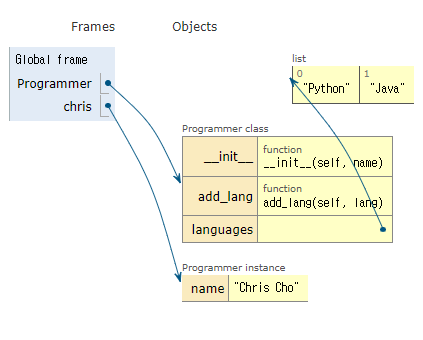

In [12]:
ujin = Programmer('Ujin Cho')
print(ujin.name)
print(ujin.languages) # ujin 객체에는 language 를 추가한적도 없는데 값이 들어가있음
print(Programmer.languages)

Ujin Cho
['Python', 'Java']
['Python', 'Java']


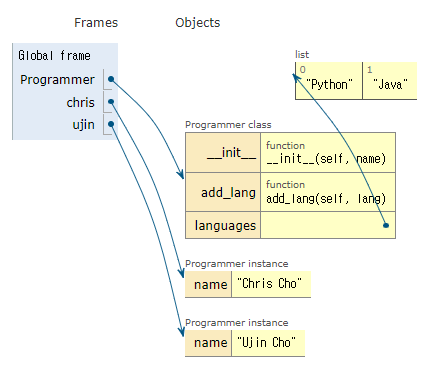

위와 같은 문제를 해결하기 위해서는 객체 단위로 값이 따로 관리되는 변수는 반드시 인스턴스 변수를 사용해야 한다!!

In [13]:
class Programmer:
    def __init__(self, name): # 초기화 함수 재정의
        self.name = name # 인스턴스 변수 선언 및 초기화
        self.languages = []
    def add_lang(self, lang): 
        self.languages.append(lang) # 클래스 변수 값 변경(클래스 안에서 self 안쓰면 에러)
        
chris = Programmer('Chris Cho')
chris.add_lang('Python')
chris.add_lang('Java')
print(chris.name)
print(chris.languages)

ujin = Programmer('Ujin Cho')
print(ujin.name)
print(ujin.languages)

Chris Cho
['Python', 'Java']
Ujin Cho
[]


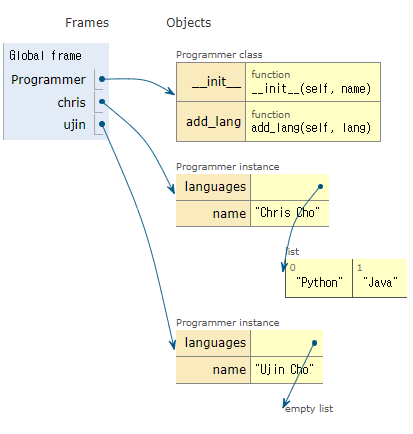

In [14]:
class Programmer:
    languages = [] # mutable 클래스 변수 선언
    num = 1
    def __init__(self, name): # 초기화 함수 재정의
        self.name = name # 인스턴스 변수 선언 및 초기화
    def add_lang(self, lang): 
        self.languages.append(lang) # 클래스 변수 값 변경(클래스 안에서 self 안쓰면 에러)
        self.num += 1
        
chris = Programmer('Chris Cho')
chris.add_lang('Python')
chris.add_lang('Java')
print(chris.name)
print(chris.languages)
print(Programmer.languages)
print("Programmer.num",Programmer.num)
print("chris.num",chris.num)

ujin = Programmer('Ujin Cho')
print(ujin.name)
print(ujin.languages)
print("Programmer.num",Programmer.num)
print("ujin.num",ujin.num)
ujin.add_lang('Go')
print("ujin.num",ujin.num)
print(chris.languages)

Chris Cho
['Python', 'Java']
['Python', 'Java']
Programmer.num 1
chris.num 3
Ujin Cho
['Python', 'Java']
Programmer.num 1
ujin.num 1
ujin.num 2
['Python', 'Java', 'Go']


chris 객체의 경우 클래스변수의 num=1 에서부터 누적해서 num=3 을 가지고 있다

새로운 객체 ujin 을 만드면 클래스변수 num=1 부터 카운트 시작된다


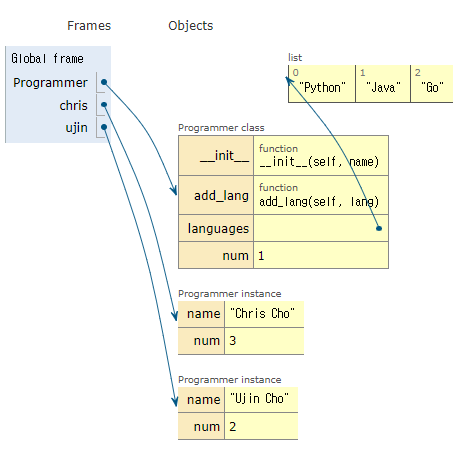

In [15]:
class Programmer:
    languages = [] # mutable 클래스 변수 선언
    num = 1
    def __init__(self, name): # 초기화 함수 재정의
        self.name = name # 인스턴스 변수 선언 및 초기화
    def add_lang(self, lang): 
        self.languages.append(lang) # 클래스 변수 값 변경(클래스 안에서 self 안쓰면 에러)
        Programmer.num += 1
        
chris = Programmer('Chris Cho')
chris.add_lang('Python')
chris.add_lang('Java')
print(chris.name)
print(chris.languages)
print(Programmer.languages)
print("Programmer.num",Programmer.num)
print("chris.num",chris.num)

ujin = Programmer('Ujin Cho')
print(ujin.name)
print(ujin.languages)
print("Programmer.num",Programmer.num)
print("ujin.num",ujin.num)
ujin.add_lang('Go')
print("ujin.num",ujin.num)

Chris Cho
['Python', 'Java']
['Python', 'Java']
Programmer.num 3
chris.num 3
Ujin Cho
['Python', 'Java']
Programmer.num 3
ujin.num 3
ujin.num 4


chris 객체에서 add_lang 메소드를 수행할때마다 클래스 변수에 값을 추가해서 새로운 객체인 ujin은 클래스 변수를 이어받아 3부터 시작한다

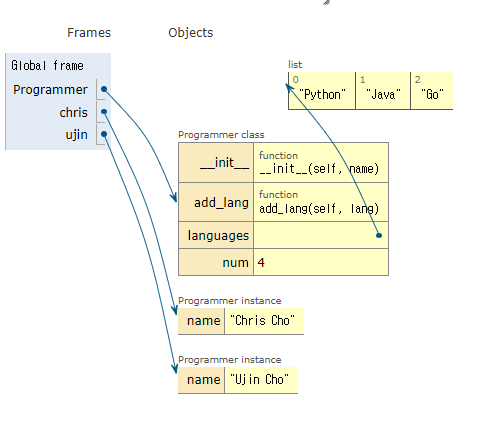

**변수 범위 (global, nonlocal, local)**

In [16]:
spam = 'haha'
def scope_test():
    
    def do_local():
        spam = "local spam" # do_local() 안에서만 쓰이는 spam 변수 생성

    def do_nonlocal():      # nonlocal() 영역에서 쓰이는 spam = "test spam" 객체가 가리키는 문자열을 바꾼다
        nonlocal spam
        spam = "nonlocal spam"

    def do_global():
        global spam         # global 영역의 spam = 'haha' 객체가 가리키는 문자열을 바꾼다
        spam = "global spam"

    spam = "test spam"
    do_local()
    print("[1]After local assignment:", spam)
    do_nonlocal()
    print("[2]After nonlocal assignment:", spam)
    do_global()
    print("[3]After global assignment:", spam)

scope_test()
print("[4]In global scope:", spam)

[1]After local assignment: test spam
[2]After nonlocal assignment: nonlocal spam
[3]After global assignment: nonlocal spam
[4]In global scope: global spam


**클래스 상속**
1. 부모클래스 : 상속하는 클래스, SuperClass, 기본 클래스
2. 자식클래스 : 상속받는 클래스, SubClass, 파생 클래스

In [17]:
class JSS:
    def __init__(self): # 인스턴스를 생성하는 순간 실행되는 함수(클래스에서 반드시 필요한 내용이 들어감)
        print('JSS클래스 선언!')
        self.name = input('이름: ')
        self.age = int(input('나이: '))
    def show(self):
        print('나의 이름은 {}, 나이는 {}세입니다.'.format(self.name, self.age))

In [18]:
class JSS3(JSS):
    def __init__(self):    # JSS 의 init 함수가 오버라이딩된다
        super().__init__() # JSS 의 init 까지 같이 쓰고 싶으면 이렇게 써줘야한다
        #super(JSS2, self).__init__() # 파이썬 2.x 는 이렇게 썼다       
        self.gender = input('성별: ')
    def show(self):
        print('나의 이름은 {}, 성별은 {}자, 나이는 {}세입니다.'.format(self.name, self.gender, self.age))


In [19]:
a = JSS3()

JSS클래스 선언!
이름: 홍길동
나이: 30
성별: 남


In [20]:
a.show()

나의 이름은 홍길동, 성별은 남자, 나이는 30세입니다.


In [21]:
class JSSS:
    def __init__(self): # 인스턴스를 생성하는 순간 실행되는 함수(클래스에서 반드시 필요한 내용이 들어감)
        print('JSS클래스 선언!')
        self.name = input('이름: ')
        self.age = int(input('나이: '))

    def show(self):
        print('나의 이름은 {}, 나이는 {}세입니다.'.format(self.name, self.age))

In [22]:
class JSSS3(JSSS):
    def __init__(self, x): # JSS 의 init 함수가 오버라이딩된다
        super().__init__() # JSS 의 init 까지 같이 쓰고 싶으면 이렇게 써줘야한다
        #super(JSS2, self).__init__() # 파이썬 2.x 는 이렇게 썼다       
        self.gender = input('성별: ')
        self.num = x
    def show(self):
        print('나의 이름은 {}, 성별은 {}자, 나이는 {}세입니다.'.format(self.name, self.gender, self.age))
        print("num",self.num)


In [23]:
a = JSSS3(30)

JSS클래스 선언!
이름: 홍길둥
나이: 28
성별: 여


In [24]:
a.show()

나의 이름은 홍길둥, 성별은 여자, 나이는 28세입니다.
num 30


In [25]:
class JSSS3:
    def __init__(self, x): # 인스턴스를 생성하는 순간 실행되는 함수(클래스에서 반드시 필요한 내용이 들어감)
        print('JSS클래스 선언!')
        self.name = input('이름: ')
        self.age = int(input('나이: '))
        self.num2 = x + 100
        
    def show(self):
        print('나의 이름은 {}, 나이는 {}세입니다.'.format(self.name, self.age))

In [26]:
class JSSS33(JSSS3):
    def __init__(self, x):  # JSS 의 init 함수가 오버라이딩된다
        super().__init__(x) # JSS 의 init 까지 같이 쓰고 싶으면 이렇게 써줘야한다
        #super(JSS2, self).__init__() # 파이썬 2.x 는 이렇게 썼다       
        self.gender = input('성별: ')
        self.num = x

    def show(self):
        print('나의 이름은 {}, 성별은 {}자, 나이는 {}세입니다.'.format(self.name, self.gender, self.age))
        print("num",self.num)
        print("num2",self.num2)


In [27]:
a = JSSS33(30)

JSS클래스 선언!
이름: 홍길덩
나이: 24
성별: 남


In [28]:
a.show()

나의 이름은 홍길덩, 성별은 남자, 나이는 24세입니다.
num 30
num2 130


In [29]:
class J3:
    def __init__(self): # 인스턴스를 생성하는 순간 실행되는 함수(클래스에서 반드시 필요한 내용이 들어감)
        print('JSS클래스 선언!')
        self.name = input('이름: ')
        self.age = int(input('나이: '))
        self.num2 = self.num # 자식클래스에 있는 num을 부모클래스의 num2로 넣는다
        
    def show(self):
        print('나의 이름은 {}, 나이는 {}세입니다.'.format(self.name, self.age))

In [30]:
class JJ3(J3):
    def __init__(self, x):  # JSS 의 init 함수가 오버라이딩된다
        
        #super(JSS2, self).__init__() # 파이썬 2.x 는 이렇게 썼다       
        self.gender = input('성별: ')
        self.num = x
        super().__init__() # JSS 의 init 까지 같이 쓰고 싶으면 이렇게 써줘야한다

    def show(self):
        print('나의 이름은 {}, 성별은 {}자, 나이는 {}세입니다.'.format(self.name, self.gender, self.age))
        self.num2 *= 2
        print("num",self.num)
        print("num2",self.num2)


In [31]:
a = JJ3(30)

성별: 여
JSS클래스 선언!
이름: 홍길순
나이: 20


In [32]:
a.show()

나의 이름은 홍길순, 성별은 여자, 나이는 20세입니다.
num 30
num2 60


In [33]:
class Person:
    
    def __init__(self, firstname, lastname):
        self.firstname = firstname
        self.lastname = lastname
    
    def name(self):
        return self.firstname + " " + self.lastname

class Employer(Person):
    
    def __init__(self, firstname, lastname, position):
        super().__init__(firstname, lastname)
				#Person.__init__(self, firstname, lastname)
        self.position = position
    
    def info(self):
        return "Employer : " + self.name() + ", "\
                + self.position

class Employee(Person):
    
    def __init__(self, firstname, lastname, staffId):
        super().__init__(firstname, lastname)
				#Person.__init__(self, firstname, lastname)
        self.staffId = staffId
    
    def info(self):
        return "Employee : " + self.name() + ", "\
                + str(self.staffId)

In [38]:
shim = Employee('shim','seunghyuk','staff')

In [39]:
shim.info()

'Employee : shim seunghyuk, staff'